<center>

<!-- <h1><b>Network Friendly Recommendation System</b> </h1> -->
<h1>$\textbf{Unmasking Diabetes: A Comprehensive Analysis of Patient Data and Classifier Performance}$</h1>





$\textit{Author : Ioannis Kontogiorgakis}$<br>
$\textit{Date : June 29, 2023}$<br>
<br>













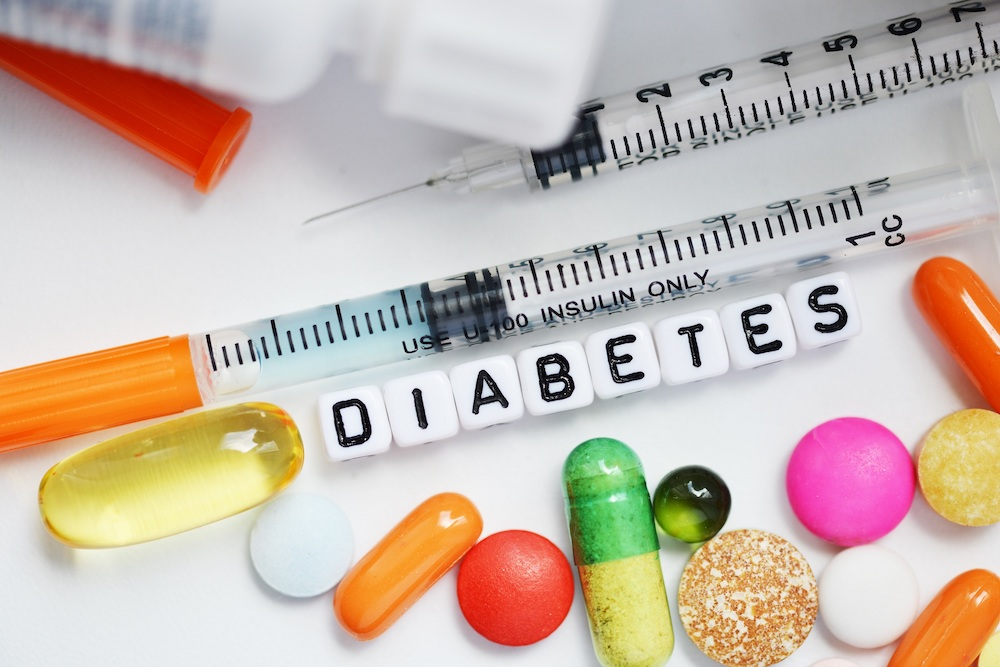

<h3>$\textbf{1. Introduction}$</h3>

Diabetes, a chronic metabolic disorder affecting millions worldwide, presents a significant healthcare challenge. Early and accurate diagnosis of diabetes is essential for effective patient management. In this Jupyter notebook, we embark on a comprehensive journey into understanding a dataset containing information about diabetic patients. Our primary objectives are twofold: firstly, to perform an in-depth Exploratory Data Analysis (EDA) to gain insights into the dataset's characteristics, distributions, and potential relationships among variables; and secondly, to evaluate the performance of various classification algorithms, including Logistic Regression, Support Vector Machine (SVM), Random Forest, XGBoost, CatBoost, and an Ensemble model composed of the last three, in predicting diabetic or non-diabetic status.

Through this analysis, we aim to uncover hidden patterns, correlations, and potential predictive features within the dataset, ultimately paving the way for more informed medical decisions and improved patient care. Additionally, we will explore the explainability of the best-performing classification model, providing healthcare practitioners with insights into the factors contributing to diabetes diagnosis. Our journey begins with a thorough exploration of the dataset, followed by the application of machine learning models, and concludes with an examination of model explainability, empowering practitioners with valuable tools for diabetic patient classification and a deeper understanding of the underlying decision-making processes.

In [ ]:
!pip install imbalanced-learn
!pip install catboost
!pip install shap

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from collections import Counter
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import metrics
# import sklearn.metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, make_scorer
from sklearn.pipeline import Pipeline
import shap


# import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import xgboost as xgb
from catboost import CatBoostClassifier, Pool


#Import Sampler libraries
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, make_scorer

<br>
<br>
Read the dataset

In [ ]:
init_df = pd.read_csv('/content/drive/MyDrive/master/Detection and Estimation/diabetes_prediction_dataset.csv')

print(init_df.shape)
init_df.head()

(100000, 9)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


<br><br><br><br>
<h4><b>Dataset Description</b></h4>

The dataset contains the following features:

- <b>Gender:</b> Categorical variable representing the gender of the individual (e.g., 'Male', 'Female').
- <b>Age:</b> Numeric variable representing the age of the individual.
- <b>Hypertension:</b> Binary variable (0 or 1) indicating whether the individual has hypertension (0 for no, 1 for yes).
- <b>Heart Disease:</b> Binary variable (0 or 1) indicating whether the individual has heart disease (0 for no, 1 for yes).
- <b>Smoking History:</b> Categorical variable representing the smoking history of the individual (e.g., 'never', 'current', 'No Info').
- <b>BMI (Body Mass Index):</b> Numeric variable representing the body mass index of the individual.
- <b>HbA1c Level:</b> Numeric variable representing the HbA1c level of the individual, which is an indicator of blood glucose levels over a period of time.
- <b>Blood Glucose Level:</b> Numeric variable representing the blood glucose level of the individual.
- <b>Diabetes:</b> Binary variable (0 or 1) indicating whether the individual has diabetes (0 for no, 1 for yes).


In [ ]:
init_df = init_df[init_df['gender'] != 'Other']
init_df = init_df.drop_duplicates()
init_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96128 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96128 non-null  object 
 1   age                  96128 non-null  float64
 2   hypertension         96128 non-null  int64  
 3   heart_disease        96128 non-null  int64  
 4   smoking_history      96128 non-null  object 
 5   bmi                  96128 non-null  float64
 6   HbA1c_level          96128 non-null  float64
 7   blood_glucose_level  96128 non-null  int64  
 8   diabetes             96128 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


<br></br>
<br></br>
<h3>$\textbf{2. Exploratory Data Analysis (EDA)}$</h3>

In the EDA section, we will explore the distribution of data within each class, with a particular focus on the impact of various features in relation to diabetes. This analysis aims to uncover insights into the relationships between different variables and their influence on diabetes status within the dataset.

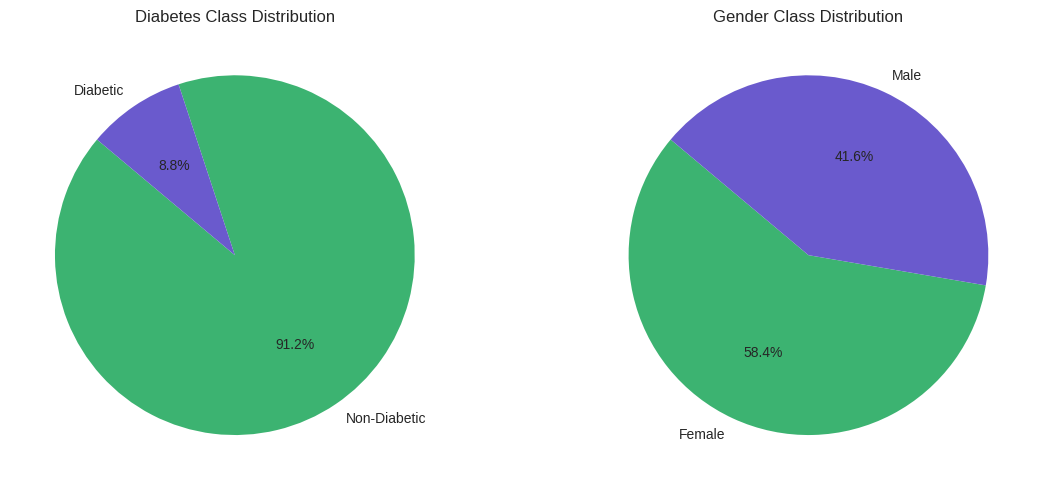

In [ ]:
# using the style for the plot
plt.style.use('seaborn')

colors=['mediumseagreen','slateblue']

# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


# Plot the pie chart on the left
diab_class_counts = init_df['diabetes'].value_counts()
diab_labels = ['Non-Diabetic', 'Diabetic']
axes[0].pie(diab_class_counts, labels=diab_labels, autopct='%1.1f%%', startangle=140, colors=colors)
axes[0].set_title('Diabetes Class Distribution')


# Plot the pie chart on the left
gender_class_counts = init_df['gender'].value_counts()
gender_labels = ['Female', 'Male']
axes[1].pie(gender_class_counts, labels=gender_labels, autopct='%1.1f%%', startangle=140, colors=colors)
axes[1].set_title('Gender Class Distribution')


# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

The initial pie chart depicting the distribution of diabetes status indeed reveals a significant imbalance within our dataset. With a vast majority (91.2%) of instances falling into the non-diabetic category and only a smaller fraction (8.8%) belonging to the diabetic group, this disparity underscores the need for effective sampling techniques to address the class imbalance issue. Imbalanced datasets can lead to biased model training and skewed predictions, which could potentially result in misclassification, especially for the minority class, in this case, the diabetic patients.

Regarding the gender distribution, the pie chart illustrates that approximately 41.6% of the individuals in the dataset are male, while the remaining 58.4% are female. While these proportions may not be perfectly balanced, the relatively close distribution between genders suggests a reasonably representative dataset in terms of gender demographics. It is worth noting that in medical and health-related datasets, gender balance can be influenced by the prevalence of certain conditions within specific demographics. This distribution is reasonable for our analysis, allowing for meaningful insights into gender-related aspects of diabetes classification.

<br><br>
Numberical Classes Distributions


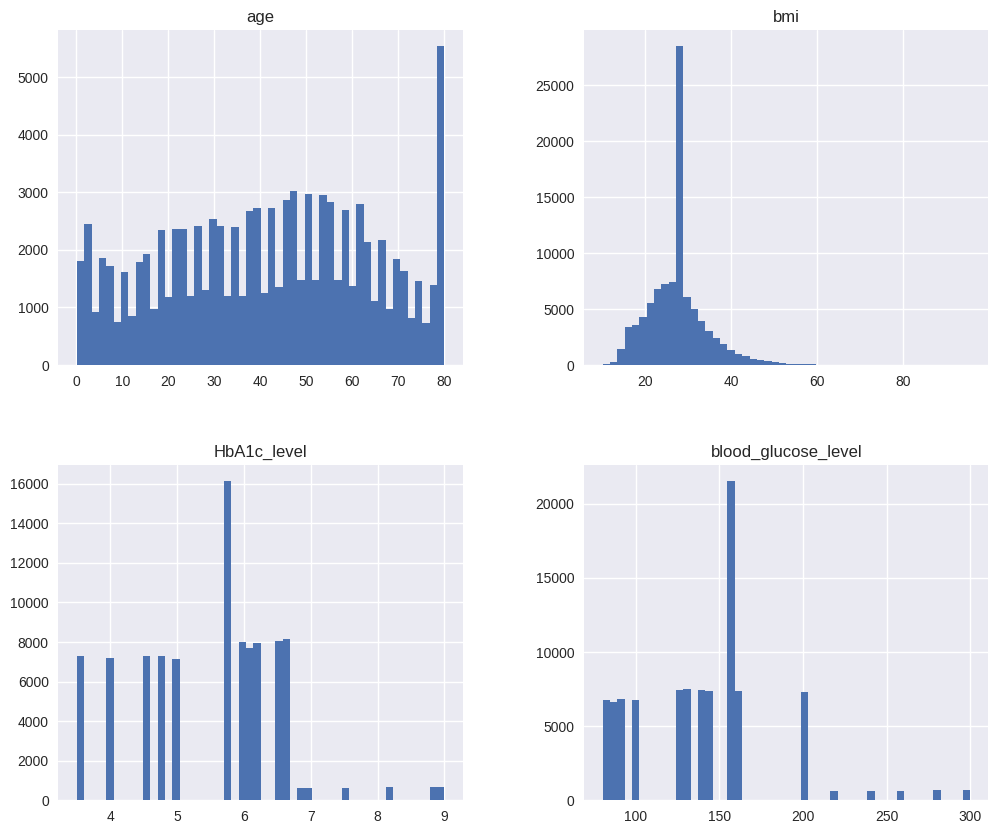

In [ ]:
init_df.hist(column= ["age", "bmi", "HbA1c_level","blood_glucose_level"],bins=50 , figsize=(12,10))
plt.show()

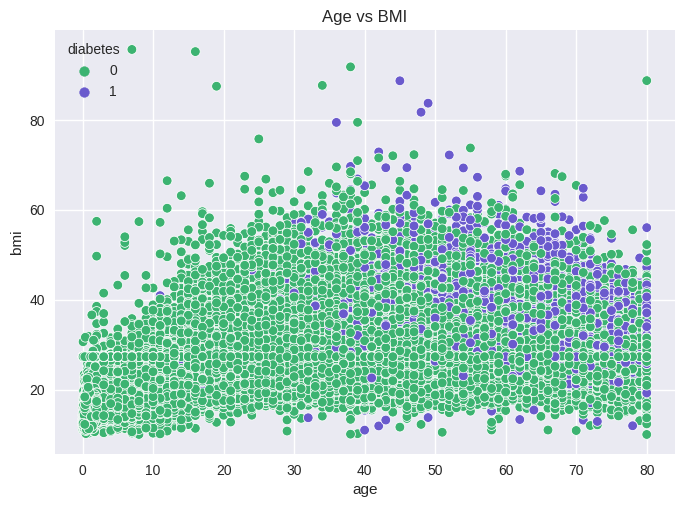

In [ ]:
# Scatterplot Age vs BMI colored by Diabetes classification
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=init_df, palette=colors)
plt.title('Age vs BMI')
plt.show()

The above scatterplot illustrating the relationship between Age and diabetes status provides compelling evidence that diabetes tends to affect individuals of advanced age ( >= 40). This association can be attributed to the natural aging process, as well as accumulated risk factors, such as lifestyle choices, genetic predispositions, and the presence of other medical conditions. As individuals grow older, their bodies may become less efficient at managing blood sugar levels, increasing the susceptibility to diabetes, particularly type 2 diabetes. The prominence of diabetes diagnoses among older age groups underscores the significance of age as a key risk factor and calls for targeted preventive measures and healthcare interventions for the elderly population. This observation aligns with established medical knowledge and highlights the importance of age in diabetes risk assessment and management.

<br><br><br><br>
<h4><b>Correlation Matrix</b></h4>

A correlation matrix is a statistical tool used to quantify the strength and direction of relationships between variables within a dataset. Computed using correlation coefficients, typically Pearson's correlation for linear relationships, this matrix offers a comprehensive overview of how variables interact, aiding in identifying patterns and dependencies crucial for data analysis and predictive modeling.  the Pearson correlation coefficient (r) between two variables X and Y can be expressed using the following formula:

$$r_{XY} = \frac{\sum{(X_i - \bar{X})(Y_i - \bar{Y})}}{\sqrt{\sum{(X_i-\bar{X})^2}\sum{(Y_i - \bar{Y})^2}}}$$

where :

- $X_i$ and $Y_i$ are individual data points in variables $X$ and $Y$,
- $\bar{X}$ and $\bar{Y}$ are the means of $X$ and $Y$ respectively.

In the context of a correlation matrix using pandas `df.corr()`, this formula is applied for each pair of variables in the dataset to compute the Pearson correlation coefficient between them. The resulting correlation coefficients are organized in the below matrix format, showing the relationships between each pair of variables.

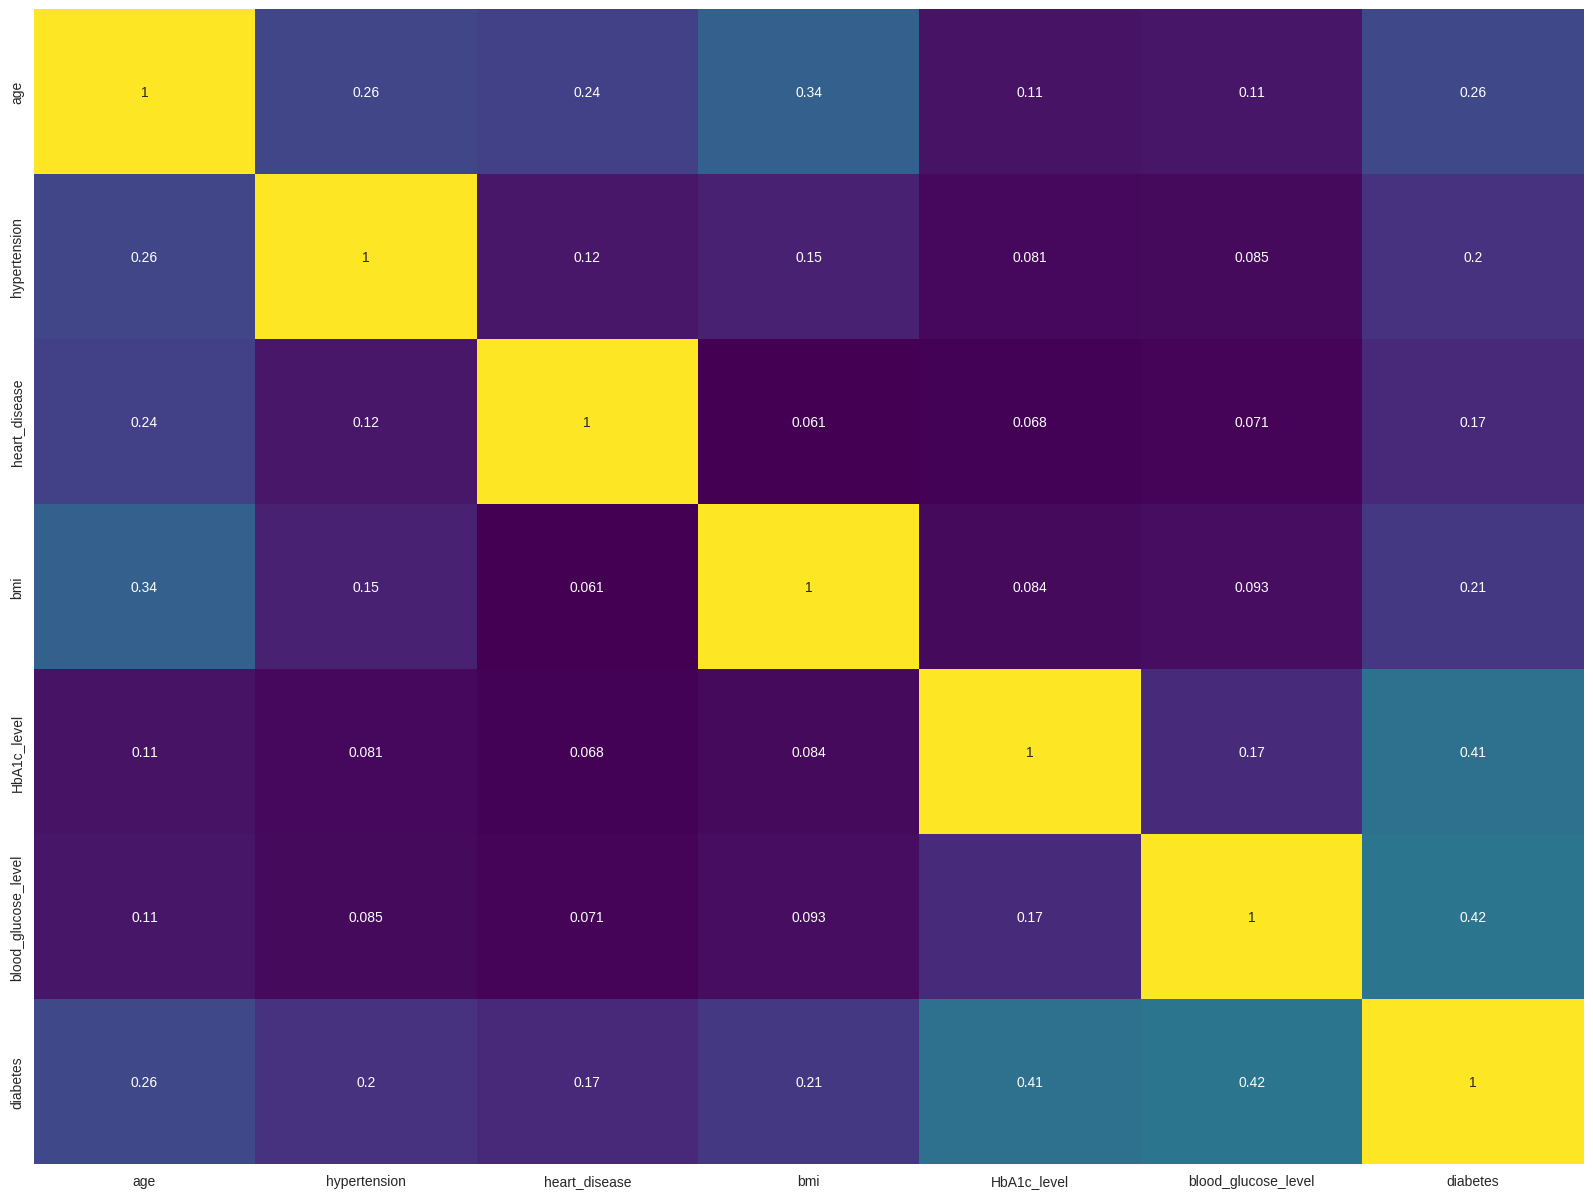

In [ ]:
corr = init_df.corr()
fig, ax = plt.subplots(figsize = (20, 15))
ax = sns.heatmap(corr,
                annot = True,
                cbar = False,
                 cmap = 'viridis')

<h4><b>Correlation of different features with diabetes</b></h4>

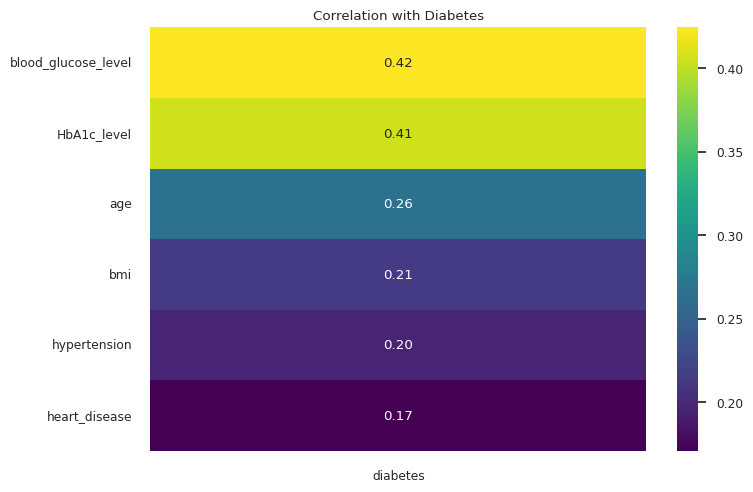

In [ ]:
# Sort correlation values in descending order

target_corr = corr['diabetes'].drop('diabetes')
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.heatmap(target_corr_sorted.to_frame(), cmap="viridis", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

The correlation results provide valuable insights into the relationship between various attributes and the presence of diabetes within the dataset. A higher positive correlation is observed between <b>diabetes</b> and <b>blood glucose level</b> (0.42), <b>HbA1c level</b> (0.41), <b>age</b> (0.26), and <b>BMI</b> (0.21). These correlations suggest that individuals with higher blood glucose levels, elevated HbA1c levels, increased age, and a higher BMI are more likely to have diabetes. Furthermore, <b>hypertension</b> (0.20) and <b>heart disease</b> (0.17) also exhibit positive correlations with diabetes, indicating a link between these conditions and the presence of diabetes. Notably, being a <b>past smoker</b> (0.09) or a <b>male</b> (0.04) slightly increases the correlation with diabetes, although to a lesser extent. Conversely, being a <b>non-smoker</b> (-0.09) or a <b>female</b> (-0.04) is negatively correlated with diabetes, suggesting a potential protective effect. These correlation insights emphasize the significance of blood glucose, HbA1c levels, age, BMI, and certain health conditions in understanding and predicting the likelihood of diabetes within the dataset.



<br></br>
<br></br>
<h3>$\textbf{3. Data Preprocessing}$</h3>


Data preprocessing plays a pivotal role in our project, ensuring that our dataset is in a clean and suitable format for machine learning model training. One crucial aspect of this preprocessing involves the transformation of categorical features using <b>one-hot encoding</b>. Categorical features, such as 'smoking_history,' provide valuable information for predicting diabetes, but most machine learning algorithms require numerical input. Through one-hot encoding, we convert these categorical variables into binary vectors, where each category becomes a binary column. This transformation preserves the information within the categorical feature while making it accessible to our models. It enables us to include 'smoking_history' in our analyses effectively, enriching our dataset and enhancing the potential for accurate diabetes predictions. In addition to one-hot encoding, data preprocessing includes tasks like handling missing values, scaling numerical features, and splitting the data into training and testing sets, setting the stage for effective model development and evaluation.

In [ ]:
# Define a function to map the existing categories to new ones
def categorize_smoking(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 'non-smoker'
    elif smoking_status == 'current':
        return 'current'
    elif smoking_status in ['ever', 'former', 'not current']:
        return 'past_smoker'

In [ ]:
def perform_one_hot_encoding(df, column_name):
    # Perform one-hot encoding on the specified column
    dummies = pd.get_dummies(df[column_name], prefix=column_name)

    # Drop the original column and append the new dummy columns to the dataframe
    df = pd.concat([df.drop(column_name, axis=1), dummies], axis=1)
    return df


In [ ]:
df = pd.DataFrame()

# Perform one-hot encoding on the gender variable
df = perform_one_hot_encoding(init_df, 'gender')

# Apply categorization to smoking_history feature
df['smoking_history'] = init_df['smoking_history'].apply(categorize_smoking)

# Perform one-hot encoding on the smoking history variable
df = perform_one_hot_encoding(df, 'smoking_history')

# Split data into features and target variable
X = df.drop('diabetes', axis=1)
y = df['diabetes']
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,smoking_history_current,smoking_history_non-smoker,smoking_history_past_smoker
0,80.0,0,1,25.19,6.6,140,0,1,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,1,0,0,1,0
2,28.0,0,0,27.32,5.7,158,0,0,1,0,1,0
3,36.0,0,0,23.45,5.0,155,0,1,0,1,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,1,0,0


In [ ]:
df.describe().style.format("{:.2f}")

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,smoking_history_current,smoking_history_non-smoker,smoking_history_past_smoker
count,96128.00,96128.00,96128.00,96128.00,96128.00,96128.00,96128.00,96128.00,96128.00,96128.00,96128.00,96128.00
mean,41.80,0.08,0.04,27.32,5.53,138.22,0.09,0.58,0.42,0.10,0.70,0.20
std,22.46,0.27,0.20,6.77,1.07,40.91,0.28,0.49,0.49,0.29,0.46,0.40
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,24.00,0.00,0.00,23.40,4.80,100.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00,1.00,0.00,0.00,1.00,0.00
75%,59.00,0.00,0.00,29.86,6.20,159.00,0.00,1.00,1.00,0.00,1.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00,1.00,1.00,1.00,1.00,1.00



<br><br>
<h4><b>3.1 Outliers removal</b></h4>

In [ ]:
def remove_outliers(dataset):
    # Define the numeric features
    numeric_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

    # Loop through numeric features and remove outliers based on IQR
    for feature in numeric_features:
        Q1 = dataset[feature].quantile(0.25)
        Q3 = dataset[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Create a mask to filter outliers
        outlier_mask = (dataset[feature] < lower_bound) | (dataset[feature] > upper_bound)

        # Remove outliers from the dataset
        dataset = dataset[~outlier_mask]
        return dataset

In [ ]:
df = remove_outliers(df)

<br><br>
<h4><b>3.2 K-Means SMOTE oversampling</b></h4>

In the initial phase of our exploratory data analysis (EDA), a crucial aspect that came to light was the significant imbalance in our dataset. With approximately <b>91.2%</b> of the instances belonging to the non-diabetic class and only <b>8.8%</b> to the diabetic class, this substantial class imbalance poses a critical challenge in the realm of machine learning. Dataset imbalance can severely impact the model's performance, as it tends to skew predictions in favor of the majority class. In a medical context, such as diabetes diagnosis, this imbalance can lead to the underestimation of the true prevalence of the condition, potentially resulting in missed diagnoses.

To address this issue, we employed a technique called <b>K-means SMOTE</b> (Synthetic Minority Over-sampling Technique). Kmeans SMOTE is a variant of SMOTE, which aims to balance the class distribution by oversampling the minority class, creating synthetic instances to equalize the class frequencies. By generating synthetic samples that resemble the minority class, we strive to alleviate the class imbalance. This not only helps in achieving a more equitable representation of both classes but also enhances the model's ability to discern subtle patterns associated with the minority class, in this case, diabetic patients.

K-means SMOTE combines two essential components:

- <b>K-means Clustering:</b> First, K-means clustering is applied to the minority class (in our case, the diabetic class). K-means divides the minority class into several clusters based on the feature space. These clusters represent subgroups or clusters of similar data points within the minority class. The number of clusters, denoted by 'K,' is a hyperparameter that can be adjusted based on the specific dataset and requirements.

- <b>SMOTE Oversampling:</b> Once the minority class is clustered, SMOTE is applied to each cluster independently. SMOTE generates synthetic instances for each cluster, creating new samples that resemble the original data points. These synthetic samples are generated by selecting a sample and its nearest neighbors within the same cluster, then interpolating between them. This process ensures that the synthetic samples are created within the same subspace as the original data, preserving the underlying data structure.

In [ ]:
counter = Counter(y)
print('Diabetes class instances before oversampling:')
print(counter)

Diabetes class instances before oversampling:
Counter({0: 87646, 1: 8482})


In [ ]:
oversampling_factor = 'auto'
over = SMOTE(sampling_strategy=oversampling_factor)
steps = [('o', over)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X, y = pipeline.fit_resample(X, y)

counter = Counter(y)
print('Diabetes class instances after oversampling:')
print(counter)

Diabetes class instances after oversampling:
Counter({0: 87646, 1: 87646})


<br><br><br>
<br></br>
<br></br>
<h3>$\textbf{4. Model Training}$</h3>

In this section, we aim to prepare our dataset for model training and evaluation. We will perform a train-test split to set aside a portion of the data for testing, apply normalization to ensure consistent feature scaling, and conduct extensive model fine-tuning for five diverse classifiers, including Logistic Regression, SVM, Random Forest, XGBoost, CatBoost, and an Ensemble model. The goal is to optimize these models to achieve the highest predictive performance and select the most suitable approach for our diabetes classification task.

<br><br>
<h4><b>4.1 Train-Test split</b></h4>

In a typical 80-20 train-test split, the dataset is divided into two subsets: 80% for training and 20% for testing. The training set is used to train a machine learning model, while the testing set is reserved for evaluating the model's performance. This split allows us to assess the model's ability to generalize to unseen data, which is crucial for ensuring its predictive capability.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y,
                                                    test_size=0.20,
                                                    random_state=123)
print('X_train shape : ',X_train.shape)
print('y_train shape : ',y_train.shape)
print('X_test shape : ',X_test.shape)
print('y_test shape : ',y_test.shape)

X_train shape :  (140233, 11)
y_train shape :  (140233,)
X_test shape :  (35059, 11)
y_test shape :  (35059,)


<br><br>
<h4><b>4.2 Normalization</b></h4>
Normalization, often referred to as feature scaling, is a preprocessing step to transform the values of different features to a common scale. The StandardScaler is a widely used technique for this purpose. It standardizes the features by subtracting the mean and dividing by the standard deviation of each feature. The formula for standardization of a feature $x$ is:

$$ x_{standardized} = \frac{x - mean(x)}{std(x)}$$

where $mean(x)$ and $std(x)$ are the mean and standard deviation of the variable $x$ respectively.
Standard scaling makes the data have a mean of 0 and a standard deviation of 1, which can be important for certain machine learning algorithms that are sensitive to the scale of features. It ensures that all features contribute proportionally to the model's learning process, avoiding the dominance of any single feature due to its scale. This preprocessing step is particularly valuable when dealing with datasets where features have different units or magnitude differences.

In [ ]:
# Scale X_train and X_test real columns
scaler = StandardScaler()
X_train[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level','hypertension','heart_disease']] = scaler.fit_transform(X_train[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level','hypertension','heart_disease']])
X_test[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level','hypertension','heart_disease']] = scaler.transform(X_test[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level','hypertension','heart_disease']])

Before defining our classifiers, we define some helper functions for our model evaluation

In [ ]:
def evaluate_model(model,X_test, y_test,name):
    """
    Evaluate a machine learning model and display various metrics.

    Parameters:
    - model: The machine learning model to be evaluated.
    - X_test: The test data.
    - y_test: True labels for the test data.
    - name: A name or label for the model.
    """
    y_pred_labels = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Use the probability of the positive class
    conf_matrix(y_pred_labels, y_test,name)

    # calculate metrics
    accuracy = model.score(X_test, y_test)
    f1_score = metrics.f1_score(y_test, y_pred_labels)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    precision = metrics.precision_score(y_test, y_pred_labels)
    recall = metrics.recall_score(y_test, y_pred_labels)
    print(f'{name} model accuracy : ',accuracy)
    print(f'{name} model f1_score : ',f1_score)
    print(f'{name} model precision : ',precision)
    print(f'{name} model recall : ',recall)
    print(f'{name} model auc : ',auc)


    trh, FPR, TPR = my_roc_curve(y_pred_proba, y_test,name)
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
    return FPR, TPR, recall, precision


def plot_precision_recall(precision, recall):
    """
    Plot the precision-recall curve using provided precision and recall values.

    Parameters:
    - precision: List of precision values.
    - recall: List of recall values.
    """

    # Plot the precision-recall curve
    plt.plot(recall, precision, linestyle='--')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')

    # Add baseline precision line
    plt.axhline(y=0.5, color='gray', linestyle='--', label='Baseline')

    # Show the plot
    plt.legend()
    plt.show()


def conf_matrix(y_pred, y_test,name):
    """
    Generate and display a confusion matrix for the model's predictions.

    Parameters:
    - y_pred: Predicted labels.
    - y_test: True labels.
    - name: A name or label for the model.
    """
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap = 'viridis')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


def TPR_FPR(pred_labels, true_labels):
    """
    Calculate True Positive Rate (TPR) and False Positive Rate (FPR) based on predicted and true labels.

    Parameters:
    - pred_labels: Predicted labels.
    - true_labels: True labels.
    """
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    P = pred_labels.count(1)
    N = pred_labels.count(0)

    for i in range(len(pred_labels)):
        if pred_labels[i] == 1 and true_labels[i] == 1:
            TP += 1
        elif pred_labels[i] == 1 and true_labels[i] == 0:
            FP += 1
        elif pred_labels[i] == 0 and true_labels[i] == 0:
            TN += 1
        elif pred_labels[i] == 0 and true_labels[i] == 1:
            FN += 1
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    return TPR, FPR


def my_roc_curve(y_pred_proba, y_test,name):
    """
    Compute and return False Positive Rate (FPR) and True Positive Rate (TPR) at different probability thresholds.

    Parameters:
    - y_pred_proba: Predicted probabilities.
    - y_test: True labels.
    - name: A name or label for the model.
    """
    thresholds = np.linspace(start=0,stop=1,retstep=True, num=100)[0]

    TPR = []
    FPR = []

    for threshold in thresholds:

        pred_labels = []

        if threshold == 0.0:
            threshold = -0.1

        for sample_prob in y_pred_proba:

            if sample_prob > threshold:
                pred_labels.append(1)
            else:
                pred_labels.append(0)


        tpr, fpr = TPR_FPR(pred_labels, y_test.values)
        TPR.append(tpr)
        FPR.append(fpr)
    return thresholds, FPR, TPR


def plot_thresh_fpr_tpr(FPR, TPR, thresholds,name):
    """
    Plot the relationship between threshold values, TPR, and FPR.

    Parameters:
    - FPR: List of False Positive Rates.
    - TPR: List of True Positive Rates.
    - thresholds: List of threshold values.
    - name: A name or label for the model.
    """
    plt.plot(thresholds, TPR, label='TPR')
    plt.plot(thresholds, FPR, label='FPR')
    plt.axhline(y=0, color='gray', linestyle='--', label='TPR = 0')
    plt.axhline(y=1, color='gray', linestyle='--', label='FPR = 1')
    plt.xlabel('Threshold')
    plt.ylabel('Rate')
    plt.title(f'Threshold vs. TPR/FPR ({name})')
    plt.legend(['TPR','FPR'])
    plt.show()


def plot_roc(FPR, TPR, name):
    """
    Plot the Receiver Operating Characteristic (ROC) curve for the model.

    Parameters:
    - FPR: False Positive Rate.
    - TPR: True Positive Rate.
    - name: A name or label for the model.
    """
    plt.plot(FPR, TPR, marker='.', label=f'{name}')
    plt.plot([0, 1], [0, 1], '--', color='grey')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend([f'{name}','Random Guess'])
    plt.title('ROC curve')
    plt.show()



def plot_precision_recall_all(recall_list, precision_list, names, colors):
    """
    Plot precision-recall curves for multiple models on the same graph.

    Parameters:
    - recall_list: List of lists containing recall values for different models.
    - precision_list: List of lists containing precision values for different models.
    - names: List of model names or labels.
    - colors: List of colors for each model's curve.
    """
    plt.figure(figsize=(20, 15), dpi=100)
    for i in range(len(recall_list)):
        plt.plot(recall_list[i], precision_list[i], linestyle='--', label=f'{names[i]}', color=colors[i])

    plt.axhline(y=0.5, color='gray', linestyle='--', label='Baseline')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(names)
    plt.title('Precision-Recall curve')
    plt.show()


def plot_roc_all(FPR_list, TPR_list, names, colors):
    """
    Plot ROC curves for multiple models on the same graph.

    Parameters:
    - FPR_list: List of lists containing False Positive Rates for different models.
    - TPR_list: List of lists containing True Positive Rates for different models.
    - names: List of model names or labels.
    - colors: List of colors for each model's curve.
    """
    plt.figure(figsize=(20, 15), dpi=100)
    for i in range(len(FPR_list)):
        plt.plot(FPR_list[i], TPR_list[i], linestyle='--', label=f'{names[i]}', color=colors[i])

    plt.plot([0, 1], [0, 1], '--', color='grey')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(names)
    plt.title('ROC curve')
    plt.show()

In [ ]:
# initialize lists for all classifier's TPR and FPR in order to create the ROC curve

TPR_list = []
FPR_list = []
recall_list = []
precision_list = []

<br><br><br><br>
<h3><b>4.3 Logistic Regression classifier</b></h3>

In [ ]:
# Define the hyperparameters and their respective values to search
LR_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Penalty term
}

In [ ]:
# Initialize the Logistic Regression classifier
lr_classifier = LogisticRegression(random_state=42)


# Initialize GridSearchCV
lr_grid_search = GridSearchCV(estimator=lr_classifier, param_grid=LR_param_grid,
                           scoring=make_scorer(accuracy_score), cv=5, verbose=1)

# Perform GridSearchCV
lr_grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters found: ", lr_grid_search.best_params_)
print("Best Accuracy found: ", lr_grid_search.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters found:  {'C': 1, 'penalty': 'l2'}
Best Accuracy found:  0.9244400284776818


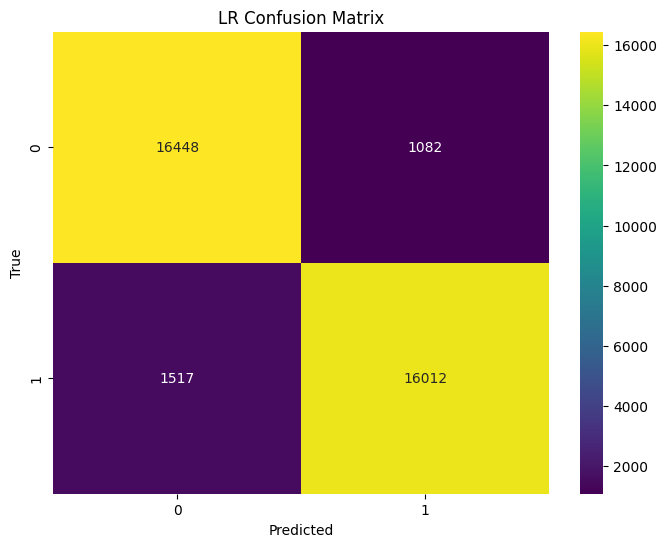

LR model accuracy :  0.9258678228129724
LR model f1_score :  0.9249342922334864
LR model precision :  0.9367029367029367
LR model recall :  0.9134576986707742
LR model auc :  0.9839203940649311


In [ ]:
LR_best_params =  {'C': 1, 'penalty': 'l2'}
model_lr = LogisticRegression(**LR_best_params, random_state=42)
model_lr.fit(X_train, y_train)

FPR, TPR, recall, precision = evaluate_model(model_lr, X_test, y_test, 'LR')
FPR_list.append(FPR)
TPR_list.append(TPR)
recall_list.append(recall)
precision_list.append(precision)

<br><br><br><br>
<h3><b>4.4 SVM classifier</b></h3>


In [ ]:
# Define the hyperparameters and the values we want to test
SVM_param_grid = {
    'kernel': ['linear','rbf'],
    'C':  [0.1, 1, 10, 100],
    'gamma': [0.1, 1, 10],
}

In [ ]:
# create classifier
SVM_clf = SVC()

# Create Grid Search object
SVM_grid_search = GridSearchCV(SVM_clf, SVM_param_grid, cv=5,verbose=1)

# Train the model
SVM_grid_search.fit(X_train, y_train)

SVM_best_params = SVM_grid_search.best_params_

# Print the best parameters
print("SVM Best Parameters: ", SVM_best_params)
print(SVM_grid_search.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


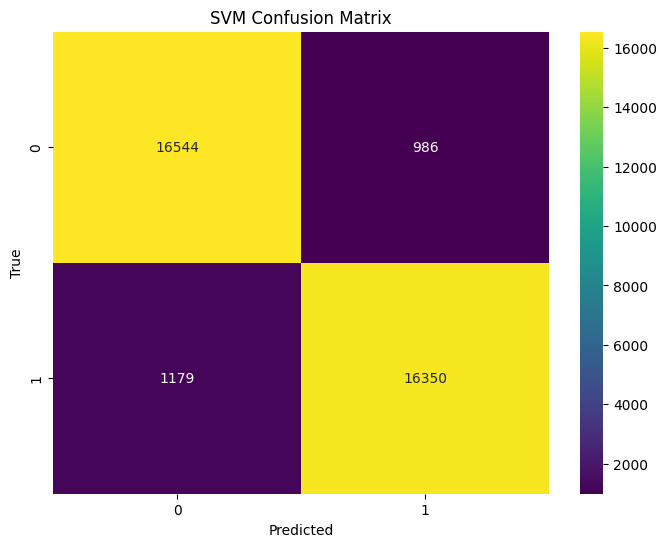

SVM model accuracy :  0.9382469551327762
SVM model f1_score :  0.9379033414599168
SVM model precision :  0.9431241347485002
SVM model recall :  0.9327400308060928
SVM model auc :  0.9879333251910116


In [ ]:
SVM_best_params =  {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
model_svm = SVC(**SVM_best_params,probability=True)
model_svm.fit(X_train, y_train)

FPR, TPR, recall, precision = evaluate_model(model_svm, X_test, y_test, 'SVM')
FPR_list.append(FPR)
TPR_list.append(TPR)
recall_list.append(recall)
precision_list.append(precision)

<br><br><br><br>
<h3><b>4.5 Random Forest classifier</b></h3>


In [ ]:
# Define the hyperparameters and the values we want to test
RF_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# create classifier
RF_clf = RandomForestClassifier()

# Create Grid Search object
RF_grid_search = GridSearchCV(RF_clf, RF_param_grid, cv=5)

# Train the model
RF_grid_search.fit(X_train, y_train)

RF_best_params = RF_grid_search.best_params_

# Print the best parameters
print("Best Parameters: ", RF_best_params)

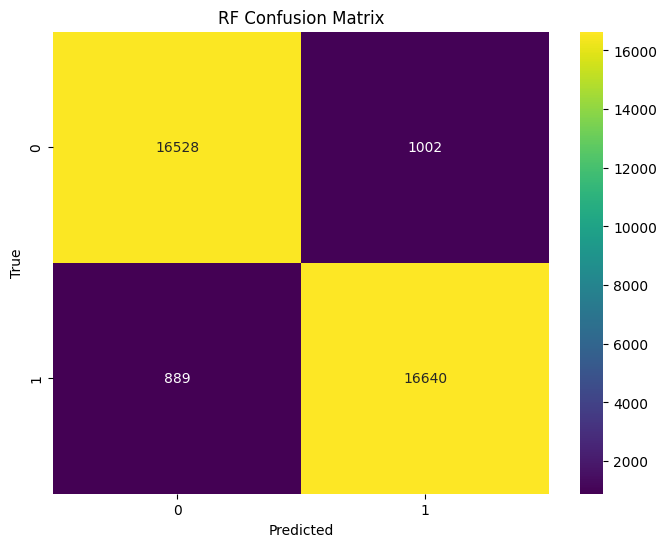

RF model accuracy :  0.9460623520351408
RF model f1_score :  0.9462341133320065
RF model precision :  0.9432037183992744
RF model recall :  0.9492840435849165
RF model auc :  0.9913130964425443


In [ ]:
# parameters after finetuning
best_params = {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
model_rf = RandomForestClassifier(**best_params)
model_rf.fit(X_train, y_train)

FPR, TPR, recall, precision = evaluate_model(model_rf, X_test, y_test, 'RF')
FPR_list.append(FPR)
TPR_list.append(TPR)
recall_list.append(recall)
precision_list.append(precision)

<br><br><br><br>
<h3><b>4.6 XGBoost classifier</b></h3>

In [ ]:
# Define the hyperparameters and their respective values to search
XGB_param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2]
}

In [ ]:
# Initialize XGB classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Initialize GridSearchCV
xgb_grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=XGB_param_grid,
                           scoring=make_scorer(accuracy_score), cv=5, verbose=1)

# Perform GridSearchCV
xgb_grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters found: ", xgb_grid_search.best_params_)
print("Best Accuracy found: ", xgb_grid_search.best_score_)

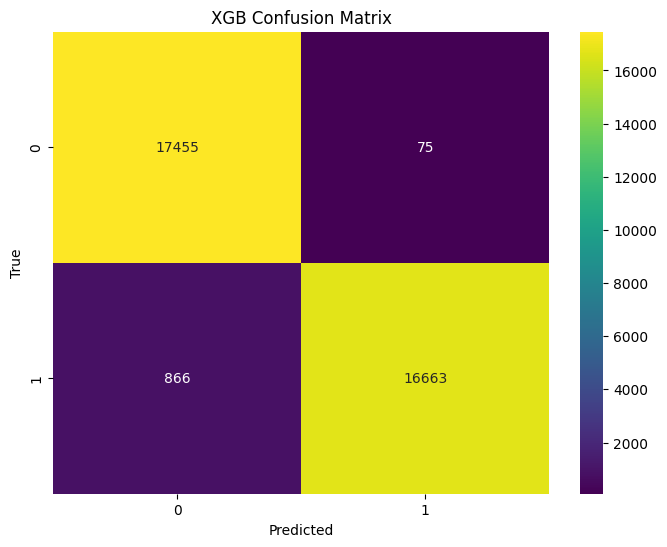

XGB model accuracy :  0.9731595310761859
XGB model f1_score :  0.9725391776344589
XGB model precision :  0.9955191779185087
XGB model recall :  0.9505961549432369
XGB model auc :  0.9966008443606955


In [ ]:
XGB_best_params =  {'objective':'binary:logistic', 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50}
model_xgb = xgb.XGBClassifier(**XGB_best_params,random_state=42)
model_xgb.fit(X_train, y_train)

FPR, TPR, recall, precision = evaluate_model(model_xgb, X_test, y_test, 'XGB')
FPR_list.append(FPR)
TPR_list.append(TPR)
recall_list.append(recall)
precision_list.append(precision)

<br><br><br><br>
<h3><b>4.7 CatBoost classifier</b></h3>

In [ ]:
# Define the hyperparameters and their respective values to search
CatBoost_param_grid = {
    'depth': [4, 6, 8],
    'iterations': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2]
}

In [ ]:
# Initialize CatBoost classifier
catboost_classifier = CatBoostClassifier(objective='Logloss', verbose=200, random_state=42)

# Initialize GridSearchCV
catboost_grid_search = GridSearchCV(estimator=catboost_classifier, param_grid=CatBoost_param_grid,
                                     scoring=make_scorer(accuracy_score), cv=5, verbose=0)

# Perform GridSearchCV
catboost_grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters found: ", catboost_grid_search.best_params_)
print("Best Accuracy found: ", catboost_grid_search.best_score_)

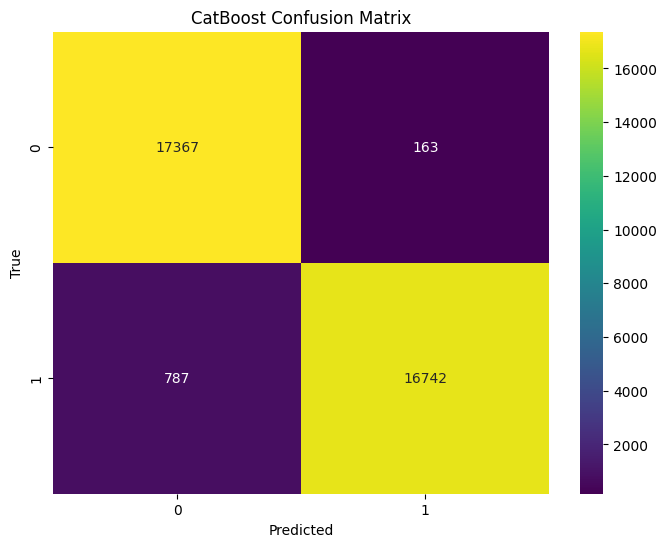

CatBoost model accuracy :  0.9729028209589549
CatBoost model f1_score :  0.9724109891386421
CatBoost model precision :  0.9903578822833481
CatBoost model recall :  0.9551029722174682
CatBoost model auc :  0.9963565242726933


In [ ]:
catboost_best_params =  {'depth': 4, 'iterations': 100, 'learning_rate': 0.1}
model_cat = CatBoostClassifier(**catboost_best_params,random_state=42, verbose=0)
model_cat.fit(X_train, y_train)

FPR, TPR, recall, precision = evaluate_model(model_cat, X_test, y_test, 'CatBoost')
FPR_list.append(FPR)
TPR_list.append(TPR)
recall_list.append(recall)
precision_list.append(precision)

<br><br><br><br>
<h3><b>4.8 Ensemble classifier (Random Forest + XGBoost + CatBoost)</b></h3>

The ensemble model we crafted in this project represents a powerful amalgamation of machine learning classifiers, leveraging the strength of three distinct algorithms: Random Forest, XGBoost (Extreme Gradient Boosting), and CatBoost. By employing a "soft" voting mechanism, the ensemble model fuses the predictions from these classifiers and aggregates them to make collective decisions. This approach harnesses the diverse capabilities of each individual classifier, allowing them to complement each other and mitigate potential weaknesses. Random Forest excels at capturing non-linearity and complex patterns, while XGBoost is adept at handling intricate feature interactions. CatBoost, renowned for its robustness and categorical feature handling, further enhances the ensemble's performance. The "soft" voting strategy takes into account the predicted probabilities of each classifier, providing a more nuanced and informed decision-making process.

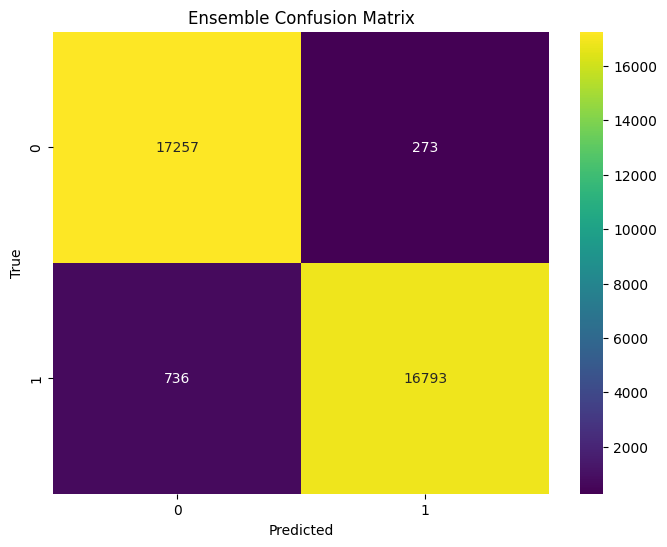

Ensemble model accuracy :  0.9712199435237742
Ensemble model f1_score :  0.9708339355398179
Ensemble model precision :  0.9840032813781788
Ensemble model recall :  0.9580124365337441
Ensemble model auc :  0.9963947870006764


In [ ]:
# Initialize the ensemble model (Voting Classifier)
model_ensemble = VotingClassifier(estimators=[
    ('rf', model_rf),
    ('xgb', model_xgb),
    ('cat', model_cat)
], voting='soft')


# Train the ensemble model
model_ensemble.fit(X_train, y_train)



FPR, TPR, recall, precision = evaluate_model(model_ensemble, X_test, y_test, 'Ensemble')
FPR_list.append(FPR)
TPR_list.append(TPR)
recall_list.append(recall)
precision_list.append(precision)

<!-- & \text {Table 1. Classification Report of different algorithms }\\ -->


<br><br><br>
<br></br>
<br></br>
<h3>$\textbf{5. Model Evaluation}$</h3>

<br><br>
<h3><b>5.1 Evaluation Results</b></h3>
<br>

In the evaluation section for the diabetes classification problem, several key metrics are employed to assess the performance of the models. These metrics offer valuable insights into various aspects of model performance. First, <b>accuracy</b> is the proportion of correctly predicted instances (both true positives and true negatives) out of the total instances and is defined as:

$$ accuracy = \frac{\text{True_Positives} + \text{True_Negatives}}{\text{Total_Instances}}$$

Accuracy provides an overall view of correct predictions but may be misleading in imbalanced datasets. To address this, we use the <b>precision</b>, which is the ratio of true positives to the sum of true positives and false positives, and is defined as:

$$ precision = \frac{\text{True_Positives}}{\text{True_Positives} +\text{False_Positives}} $$

Precision is crucial when the cost of false positives is high. <b>Recall</b>, on the other hand, is the ratio of true positives to the sum of true positives and false negatives, and is defined as:

$$ recall = \frac{\text{True_Positives}}{\text{True_Positives} +\text{False_Negatives}} $$

Recall is significant when missing actual positives is costly. The <b>F1-score</b> balances precision and recall and is defined as:

$$ F1-score = 2× \frac{Precision × Recall}{Precision + Recall}$$

<br><br>
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \textbf { Algorithm } & \textbf { Accuracy } & \textbf { F1-score } & \textbf { Precision } & \textbf { Recall } & \textbf { AUC } \\
\hline \text{Logistic Regression} & 0.926 & 0.925 & 0.936 & 0.914 & 0.983\\
\text{SVM} & 0.938 & 0.937 & 0.944 & 0.931 & 0.987\\
\text{Random Forest} & 0.945 & 0.946 & 0.94 & 0.951 & 0.99\\
\text{XGBoost} & \mathbf{0.972} & 0.971 & \mathbf{0.996} & 0.946 & \mathbf{0.996}\\
\text{CatBoost} & 0.971 & \mathbf{0.971} & 0.988 & 0.955 & 0.996\\
\text{Ensemble} & 0.97 & 0.97 & 0.982 & \mathbf{0.958} & 0.996\\
\hline
\end{array}
\end{aligned}




<br><br><br><br>
<h3><b>5.2 Receiver Operating Characteristic (ROC) Curve</b></h3>
<br>

The Receiver Operating Characteristic (ROC) curve is a graphical representation that illustrates the trade-off between the true positive rate (sensitivity) and the false positive rate (1-specificity) as the discrimination threshold for a binary classification model is varied. The true positive rate signifies the proportion of actual positive instances correctly predicted as positive, while the false positive rate represents the proportion of actual negatives wrongly predicted as positives. The ROC curve provides a visual indication of the model's ability to distinguish between the classes, with a higher area under the curve (AUC) indicating superior performance in classification tasks. A perfect model would have an AUC of 1, suggesting flawless discrimination between the classes, while random guessing would result in an AUC of 0.5, forming a diagonal line.

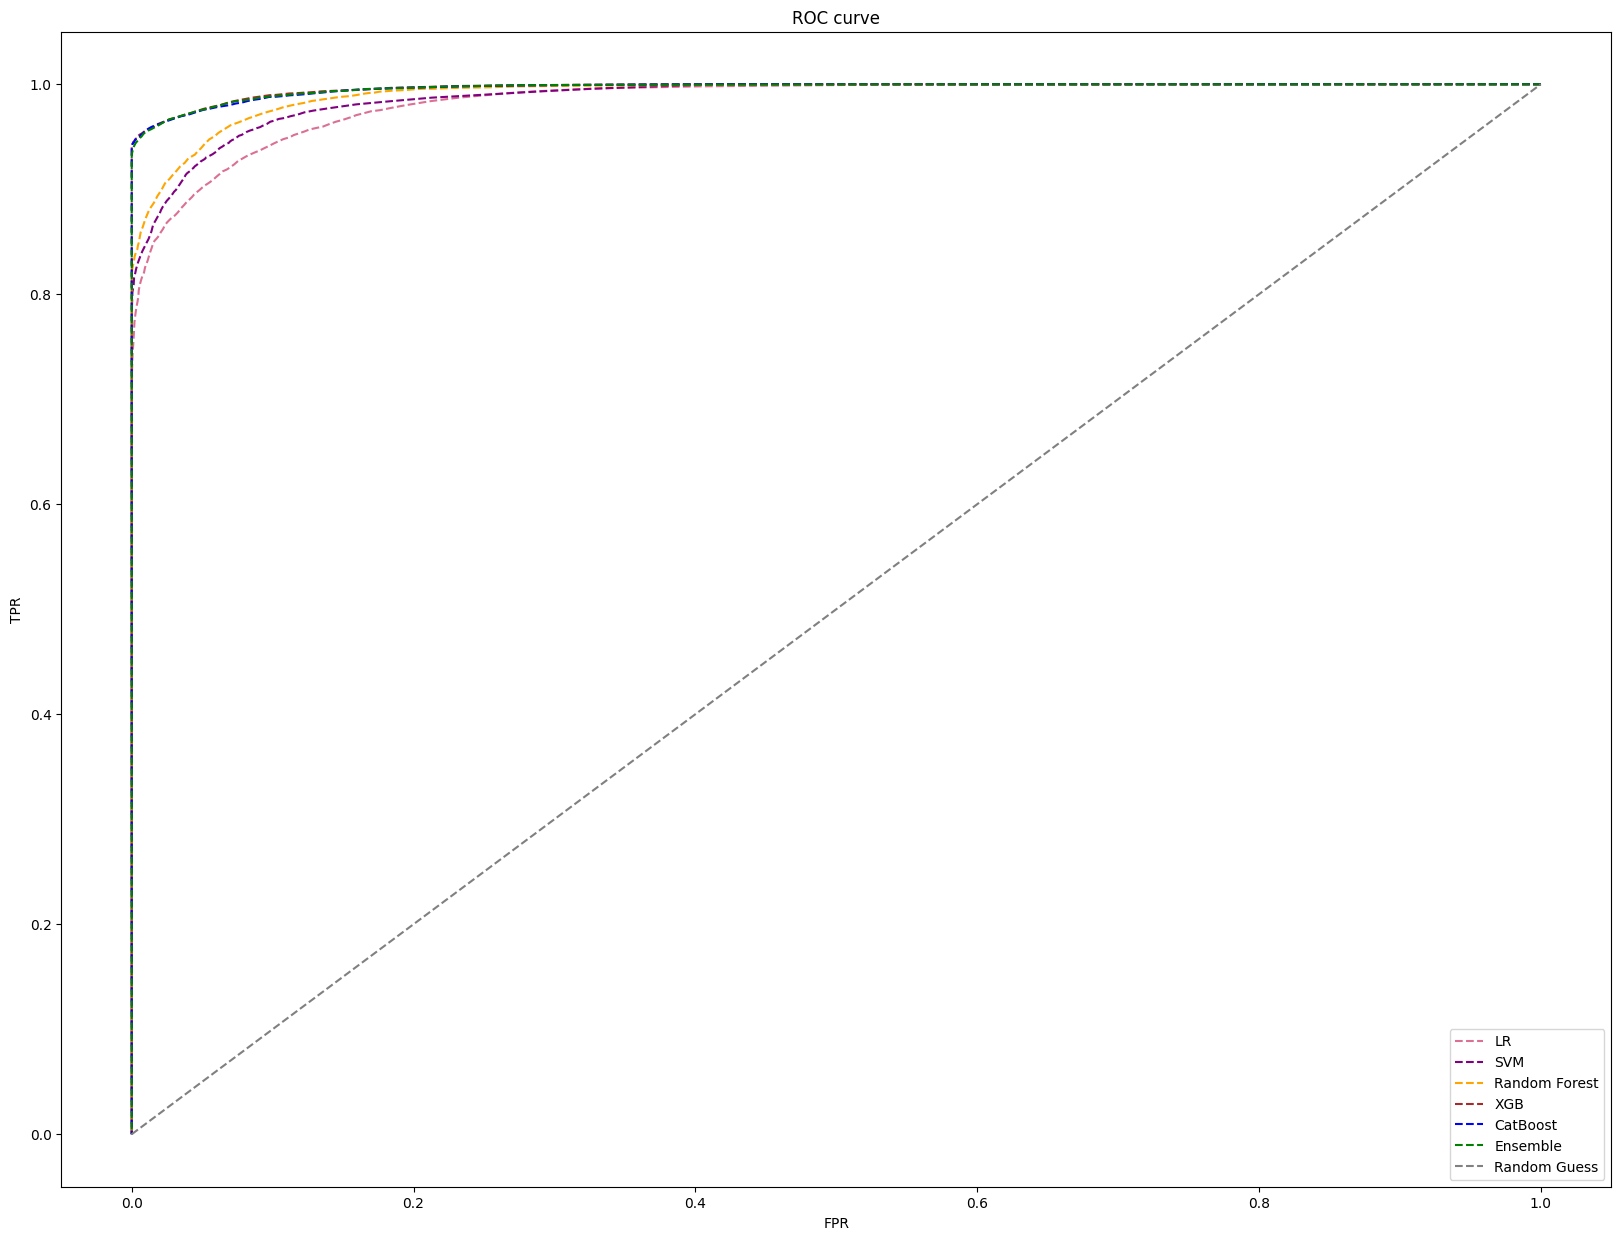

In [ ]:
names = ['LR','SVM','Random Forest','XGB','CatBoost','Ensemble','Random Guess']
colors = ['palevioletred', 'purple', 'orange','brown','blue', 'green']
plot_roc_all(FPR_list, TPR_list, names, colors)

<br><br><br><br>
<h3><b>5.3 Precision-Recall Curve</b></h3>
<br>
The Precision-Recall curve is another evaluation tool for binary classification models, focusing on the trade-off between precision and recall. Precision is the ratio of true positives to the sum of true positives and false positives, emphasizing the accuracy of positive predictions. Recall, on the other hand, is the ratio of true positives to the sum of true positives and false negatives, emphasizing the model's ability to capture all the actual positives. The Precision-Recall curve illustrates how precision and recall vary as the decision threshold changes. An ideal model would have a curve that reaches high precision with high recall, reflecting a perfect balance between accurate positive predictions and capturing all actual positives.

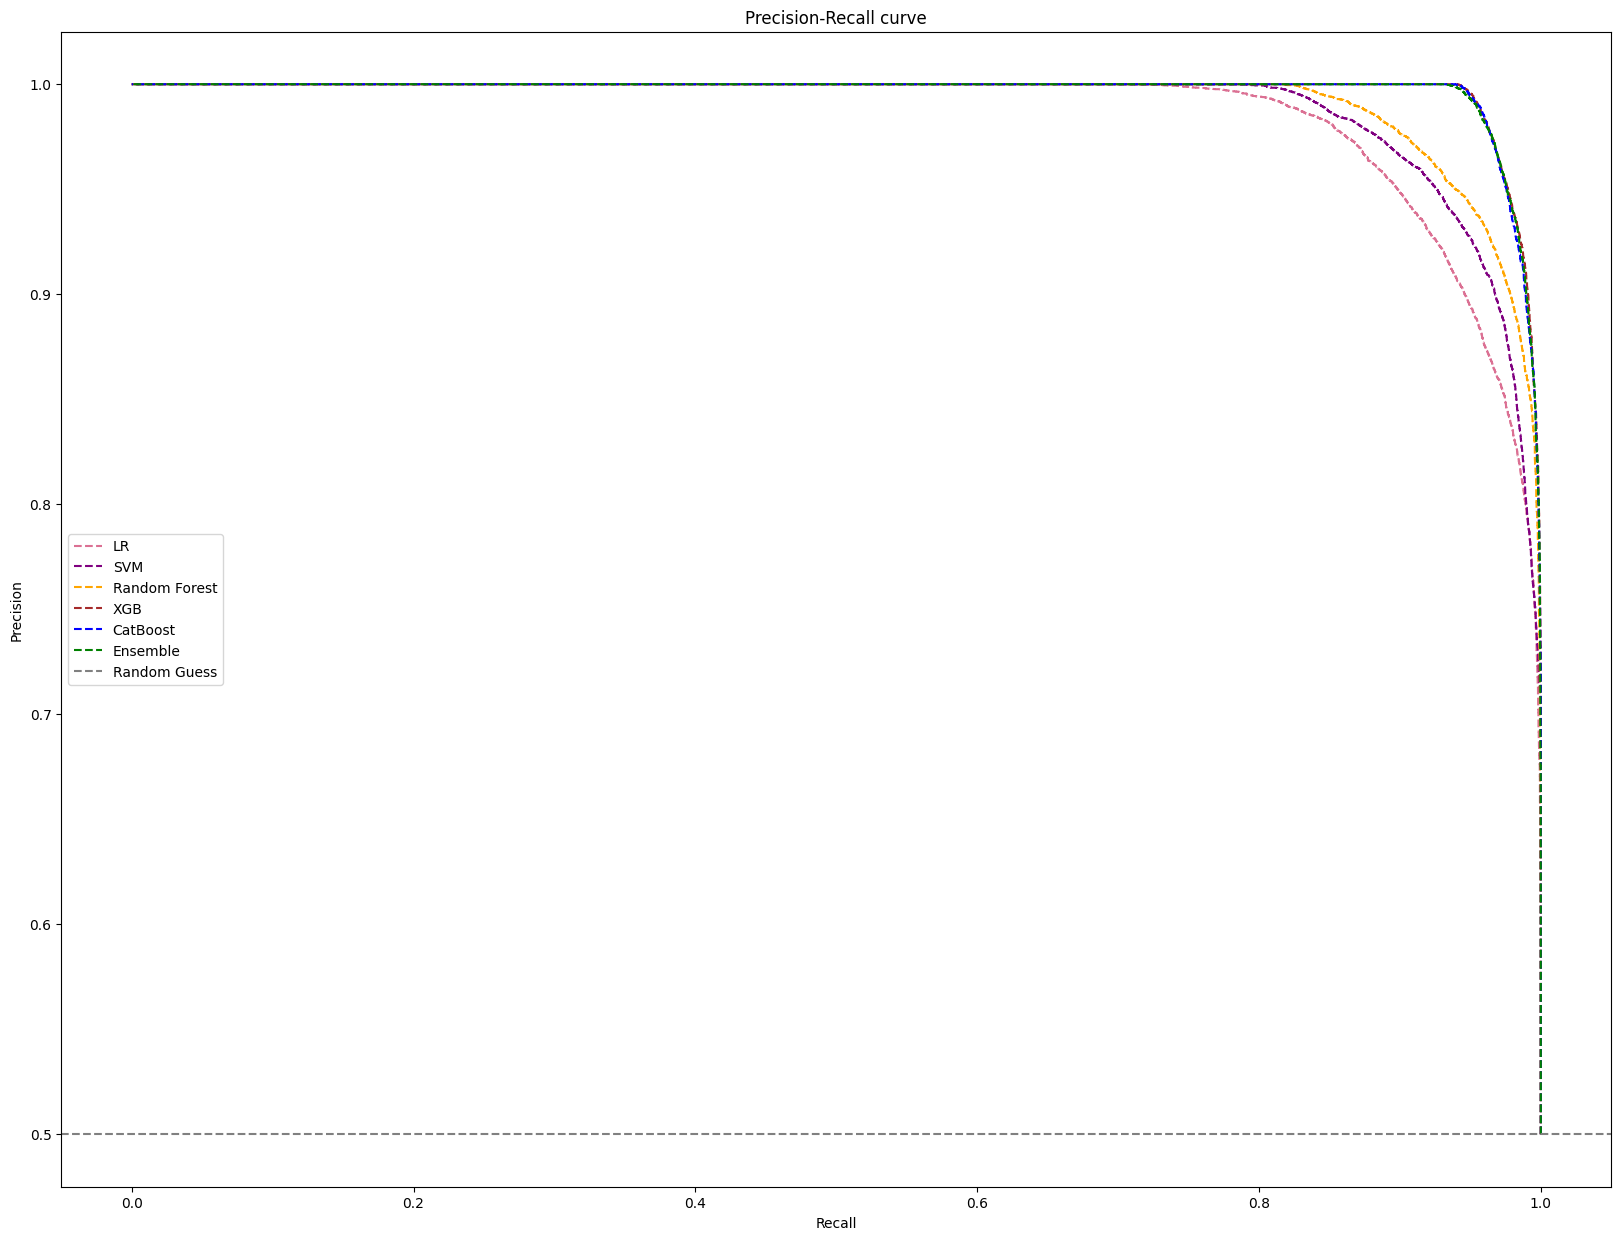

In [ ]:
names = ['LR','SVM','Random Forest','XGB','CatBoost','Ensemble','Random Guess']
colors = ['palevioletred', 'purple', 'orange','brown','blue', 'green']
plot_precision_recall_all(recall_list, precision_list, names, colors)

<br>
<br></br>
<br></br>
<h3><b>5.4 Comments</b></h3>

In the comparison of XGBoost with Random Forest, Logistic Regression, SVM, and an ensemble model in both ROC and Precision-Recall curves, XGBoost appears to perform better due to its ability to handle complex relationships and interactions in the data. XGBoost, an ensemble learning method based on decision trees, is known for its capability to capture non-linear patterns and interactions among features effectively. This is especially crucial in medical diagnosis, fraud detection, and similar domains where intricate relationships may exist. Logistic Regression and SVM, although powerful, may struggle with non-linearity and complex interactions. Random Forest, while strong in capturing non-linearity, may not be as effective as XGBoost in handling the intricate interdependencies present in the data. The ensemble model's performance, while an improvement over individual classifiers, might not surpass XGBoost due to the latter's ability to optimize the learning process and achieve a more accurate and robust model, as reflected by higher AUC in the ROC curve and a better balance between precision and recall in the Precision-Recall curve. The effectiveness of XGBoost highlights the significance of ensemble learning and its potential to enhance predictive performance in various domains


In the comparison of the above tested classifiers in both ROC and Precision-Recall curves, XGBoost, CatBoost, and the Ensemble model emerge as the top-performing models. Notably, XGBoost stands out as a slightly stronger contender. These exceptional performances are in contrast to the other models.

CatBoost, known for its robustness and efficient handling of complex data, particularly shines in capturing intricate relationships and non-linear patterns within the dataset. The Ensemble model, combining the strengths of Random Forest, XGBoost, and CatBoost, also offers a competitive performance.

On the other hand, while Logistic Regression and SVM are powerful in various contexts, they may struggle when faced with the dataset's non-linearity and complex feature interactions. Random Forest, while adept at capturing non-linear relationships, doesn't quite match the performance of CatBoost and the Ensemble model.

This evaluation underscores the effectiveness of boosting models, demonstrating their potential to enhance predictive performance in diverse domains. It also highlights the significance of ensemble learning, where the combined power of multiple strong models, particularly including XGBoost, can lead to superior results.

<br><br><br>
<br></br>
<br></br>
<h3>$\textbf{6. Model Explainability}$</h3>

Understanding the inner workings of our machine learning model is crucial, especially in healthcare applications like diabetes diagnosis. SHAP values offer a powerful tool for explaining individual predictions and discerning feature importance. In this section, we dive into the world of SHAP values to unravel the key factors driving our model's decisions.

We used the SHAP Python library to compute SHAP values for our best-performing model, XGBoost. These values provide insights into how each feature contributes to the prediction for a given patient.

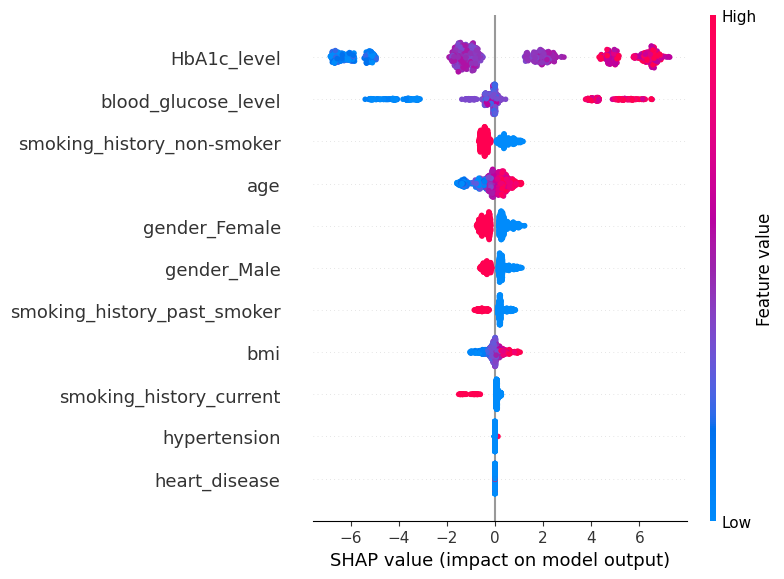

In [ ]:
# load JS visualization code to notebook
shap.initjs()

X_sampled = X_train.sample(1000, random_state=10)

# Create a tree explainer
xgb_explainer = shap.TreeExplainer(model_xgb)

shap_values = xgb_explainer(X_sampled)

# Create the SHAP summary plot
shap.summary_plot(shap_values, X_sampled)

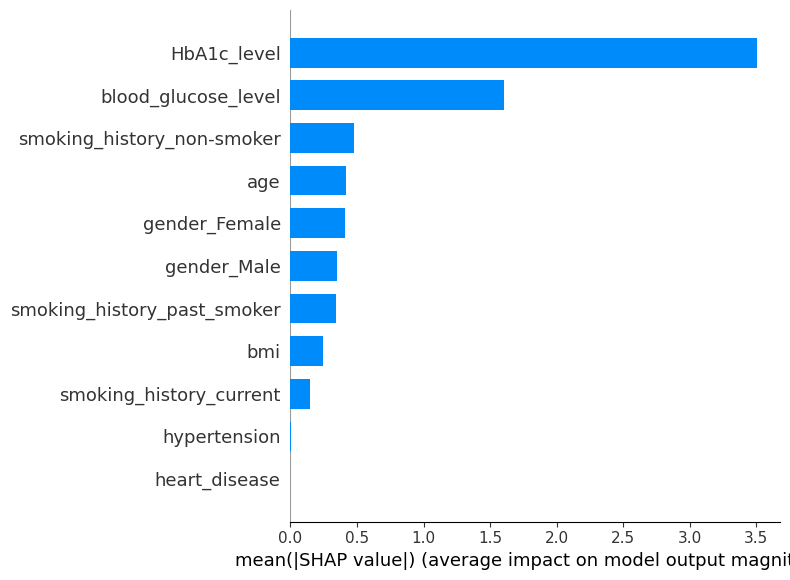

In [ ]:
shap.summary_plot(shap_values, X_sampled, plot_type="bar")

 Notably, the plot reveals that the two most impactful features are <b>HbA1c_level</b> and <b>glucose_level</b>. These features, associated with blood sugar levels and glycated hemoglobin, have a profound effect on diabetes classification, which aligns with their clinical relevance in diagnosing the condition.

 Furthermore, the summary plot identifies a set of significant features that contribute to the model's decision-making process. These include <b>smoking_history_non-smoker</b>, <b>gender_Female</b>, <b>age</b>, <b>gender_Male</b>, <b>smoking_history_past_smoker</b>, <b>bmi</b>, and <b>smoking_history_current</b>. The order of significance indicates the relative influence of these features on diabetes classification, shedding light on the complex interplay between lifestyle, demographics, and health indicators.

 Importantly, the plot also highlights that the remaining features exhibit nearly identical significance to the model's diabetes classification. This observation suggests that while other factors may have some influence, they are less pronounced in comparison to the prominent features mentioned earlier. As such, the SHAP values summary plot not only aids in understanding the relative importance of features but also provides a concise visual representation of how these features collectively contribute to the accurate classification of diabetes. This insight can be invaluable in clinical decision-making, risk assessment, and feature selection for more effective model development.